## Calculate FRC from select data source

This notebook shows how to programmatically take an FRC of a specific data source. In this environment one could try Alex's idea to take FRCs across tiles of an image and calculate the FRc for each tile. In the next step that FRC information could be rendered over the original image in some selected colour scheme.

How to do these steps is left as an exercise ;)

In [1]:
from __future__ import print_function
from PYME.recipes import modules
from PYME.LMVis import pipeline
data = pipeline.Pipeline("../data/31_5_series_D.h5r")

Trying to load 3rd party recipe module PYMEcs.recipes.processing
Loaded 3rd party recipe module PYMEcs.recipes.processing
Trying to load 3rd party recipe module PYMEnf.recipes.pymenf
Loaded 3rd party recipe module PYMEnf.recipes.pymenf
Trying to load 3rd party recipe module PYMEcs.recipes.output
Loaded 3rd party recipe module PYMEcs.recipes.output
Trying to load 3rd party recipe module PYMEcs.recipes.localisations
Loaded 3rd party recipe module PYMEcs.recipes.localisations
Trying to load 3rd party recipe module PYMEcs.recipes.base
Loaded 3rd party recipe module PYMEcs.recipes.base


In [2]:
# load our saved recipe
data.recipe.update_from_yaml('example1.yaml')
print("Current data source: %s" % data.selectedDataSourceKey) # what is the currently selected data source
print("Available data sources: %s" % ', '.join(data.dataSources.keys())) # look at all the data sources we could select

data.selectDataSource('cytosolC')
print("Number of events in data source cytosolC is %d" % data.x.size)

Current data source: filtered_localizations
Available data sources: cytosolC, coalesced, with_clumps, filtered_localizations, Localizations, clumps, colour_mapped
Number of events in data source cytosolC is 964


In [3]:
from PYME.recipes import localisations
tb = localisations.TimeBlocks(input='cytosolC',output='tbCytosolC',
                                 block_size=100)
data.recipe.add_module(tb)
dm = localisations.DensityMapping(
        inputLocalizations='tbCytosolC',
        jitterVariable="error_x",
        outputImage="FRCCytosolC",
        pixelSize=5.0,
        renderingModule='Gaussian',
        colours=['block0','block1'])
data.recipe.add_module(dm)
data.recipe.execute()

[]
['fitResults_x0', 'clumpSize', 'focus', 'nPhotons', 'fitResults_background', 'resultCode', 'fitResults_by', 'fitResults_bx', 'error_x', 'error_y', 'trackVelocity', 'sig', 'tIndex', 'z_raw', 'A', 'clumpIndex', 'fitResults_y0', 'nchi2', 'subtractedBackground', 'fitResults_sigma', 'fitResults_A', 'x_raw', 'drifty', 'driftx', 'driftz', 'y_raw', 't', 'y', 'x', 'z']
Created colour filter with chans: ['block0', 'block1']


In [4]:
image = data.dataSources['FRCCytosolC']
image.data.shape

[803, 663, 1, 2]

In [6]:
from PYMEcs.experimental import FRC

freqs,frc1,smoothed,fhb,f7,halfbit = FRC.frc_from_image(image,[0,1])
print('res-1/7     = %3.1f nm' % (1.0/f7[0]))

res-1/7     = 62.7 nm


/Users/csoe002/Documents/src/PYME-src/python-microscopy/PYME/IO/DataSources/ArrayDataSource.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  r = self.data.__getitem__(keys)


<IPython.core.display.Javascript object>


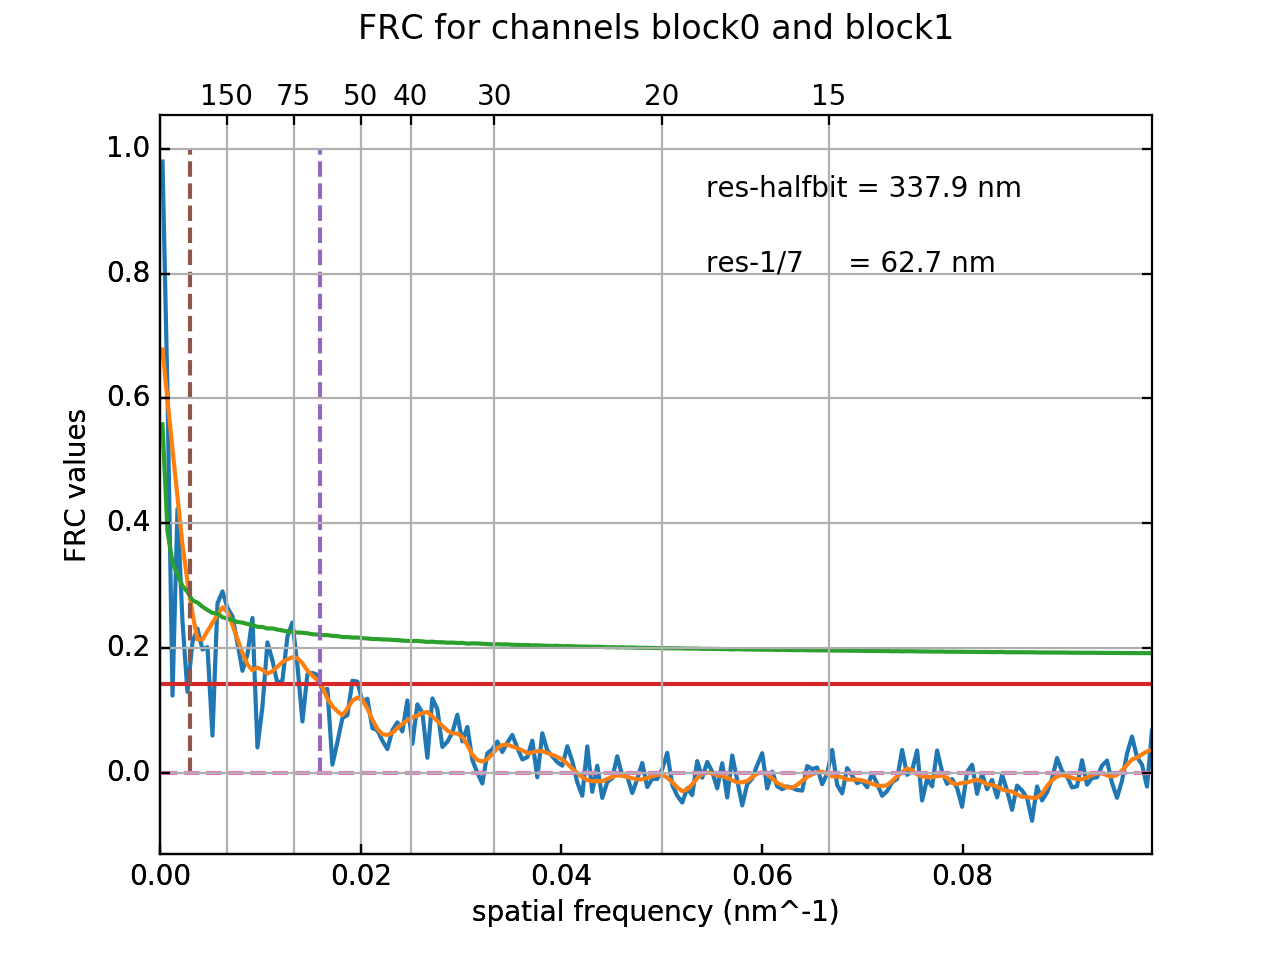

In [25]:
%matplotlib notebook
FRC.frc_plot(freqs,frc1,smoothed,fhb,f7,halfbit,showHalfbitThreshold=True)

In [21]:
def rgbwrap(r,g=None,b=None,vmax=None,vmin=None):
    if vmax is None:
        vmax = r.max()
    if vmin is None:
        vmin = r.min()
    rgbim = np.zeros(list(r.shape[0:2])+[3])
    rgbim[:,:,0] = (r-vmin)/(vmin+vmax)
    if not (g is None):
        rgbim[:,:,1] = (g-vmin)/(vmin+vmax)
    if not (b is None):
        rgbim[:,:,2] = (b-vmin)/(vmin+vmax)
    return rgbim

<IPython.core.display.Javascript object>


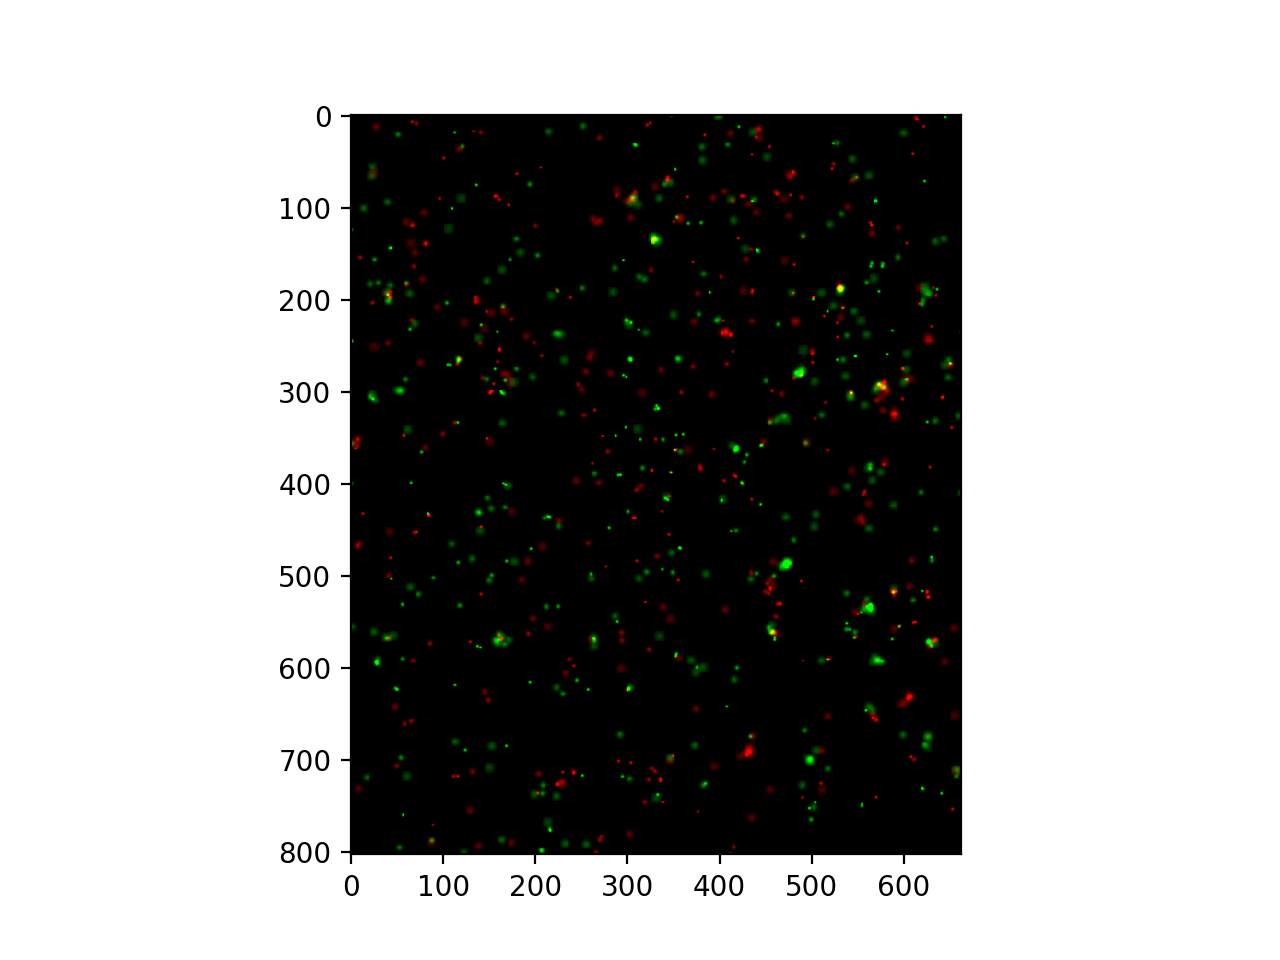

In [26]:
rgbim = rgbwrap(image.data[:,:,0,0].squeeze(),image.data[:,:,0,1].squeeze(),vmax=0.2)
plt.figure()
plt.imshow(rgbim)

<IPython.core.display.Javascript object>


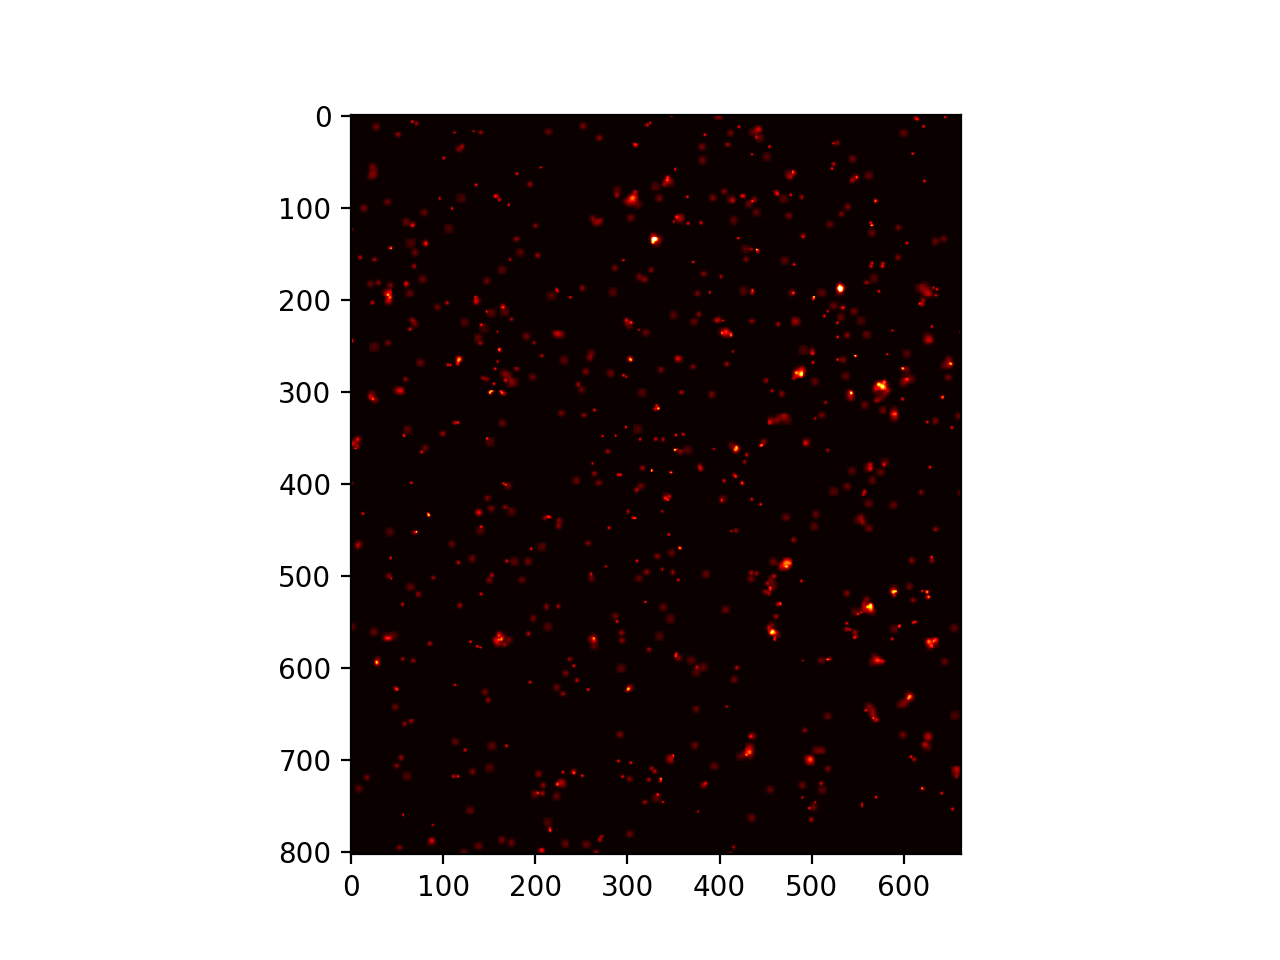

In [27]:
flatim = image.data[:,:,0,0].squeeze()+image.data[:,:,0,1].squeeze()
plt.figure()
plt.imshow(flatim,cmap='hot',vmax=0.5)